In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn-v0_8-deep')

warnings.filterwarnings('ignore')

In [2]:
movie_titles = pd.read_csv(r"C:\Users\61405\Documents\Project1\zippedData\imdb.title.basics.csv.gz")

In [3]:
missing_values_titles = movie_titles.isna().sum()
missing_values_titles
# Checking missing data

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [4]:
tidy_titles = movie_titles.drop(columns=['runtime_minutes'])
# Runtime minutes had the most missing data so I decided not to use them for analysis

In [5]:
tidy_titles.shape

(146144, 5)

In [6]:
box_office = pd.read_csv(r"C:\Users\61405\Documents\Project1\zippedData\bom.movie_gross.csv.gz")

In [7]:
box_office.shape

(3387, 5)

In [8]:
missing_values_box = box_office.isna().sum()
missing_values_box

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [9]:
box_office['foreign_gross'].fillna(0,inplace=True)
box_office['domestic_gross'].fillna(0,inplace=True)
# filling missing data with 0 

In [10]:
movie_ratings = pd.read_csv(r"C:\Users\61405\Documents\Project1\zippedData\imdb.title.ratings.csv.gz")

In [11]:
movie_ratings.shape

(73856, 3)

In [12]:
missing_values_ratings = movie_ratings.isna().sum()
missing_values_ratings

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [13]:
# merging two dataframes together on the common 'tconst'. Inner so it eliminates the rows without matches
title_rating = pd.merge(
     tidy_titles, movie_ratings, how="inner", on=['tconst']
 )
title_rating.shape

(73856, 7)

In [14]:
title_rating.head()

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119


In [15]:
# Renamed the coloumn so I could merge with the new dataframe
title_rating_rename = title_rating.rename(columns={'primary_title':'title'})

In [16]:
box_office.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
# merged all df's together
t_r_b = pd.merge(
     title_rating_rename, box_office, how="inner", on=['title']
 )
t_r_b.shape

(3027, 11)

In [18]:
t_r_b.head()

,tconst,title,original_title,start_year,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0,2016
1,tt0337692,On the Road,On the Road,2012,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [19]:
# cleaning up the new dataframe
tidy_t_r_b = t_r_b.drop(columns=['tconst','start_year','original_title'])
tidy_t_r_b

,title,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,Wazir,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0,2016
1,On the Road,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,On the Road,Drama,6.0,6,IFC,744000.0,8000000,2012
3,On the Road,Drama,5.7,127,IFC,744000.0,8000000,2012
4,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...
3022,The Chambermaid,Drama,7.1,147,FM,300.0,0,2015
3023,How Long Will I Love U,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,Helicopter Eela,Drama,5.4,673,Eros,72000.0,0,2018
3025,Last Letter,"Drama,Romance",6.4,322,CL,181000.0,0,2018


In [20]:
# Wanted the latest movies up top
tidy_t_r_b.sort_values(by='year', ascending=False)

,title,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
3026,Burn the Stage: The Movie,"Documentary,Music",8.8,2067,Trafalgar,4200000.0,16100000,2018
1702,The House That Jack Built,"Crime,Drama,Horror",6.9,35669,IFC,88000.0,0,2018
2806,7 Days in Entebbe,"Action,Drama,History",5.8,10441,Focus,3300000.0,5400000,2018
1718,The Nun,Drama,6.5,1401,WB (NL),117500000.0,248100000,2018
2808,Manmarziyaan,Romance,6.9,5061,Eros,567000.0,0,2018
...,...,...,...,...,...,...,...,...
244,Blue Valentine,"Drama,Romance",7.4,170089,Wein.,9700000.0,2600000,2010
562,For Colored Girls,Drama,6.1,6728,LGF,37700000.0,17300,2010
561,The Romantics,"Comedy,Drama,Romance",5.1,11069,FOAK,107000.0,17300,2010
560,Remember Me,Comedy,5.2,72,Sum.,19100000.0,37000000,2010


In [21]:
# only want to analyse the last 3 years of movie data
tidy1_t_r_b = tidy_t_r_b[tidy_t_r_b['year'].between(2016,2018)]
tidy1_t_r_b

,title,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,Wazir,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,0,2016
10,American Pastoral,"Crime,Drama",6.1,12898,LGF,544000.0,0,2016
31,Wonder Woman,"Action,Adventure,Fantasy",7.5,487527,WB,412600000.0,409300000,2017
32,Wonder Woman,Sci-Fi,4.2,20,WB,412600000.0,409300000,2017
33,Wonder Woman,"Documentary,Drama,Sport",6.9,13,WB,412600000.0,409300000,2017
...,...,...,...,...,...,...,...,...
3021,The Spy Gone North,Drama,7.2,1620,CJ,501000.0,0,2018
3023,How Long Will I Love U,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,Helicopter Eela,Drama,5.4,673,Eros,72000.0,0,2018
3025,Last Letter,"Drama,Romance",6.4,322,CL,181000.0,0,2018


below process was to make foreign_gross into a float as it was an object at first which meant I couldn't add to domestic_gross

In [22]:
tidy1_t_r_b['foreign_gross'] = tidy1_t_r_b['foreign_gross'].astype(str)

In [23]:
tidy1_t_r_b['foreign_gross'] = tidy1_t_r_b['foreign_gross'].str.replace(',', '')

In [24]:
tidy1_t_r_b['foreign_gross'] = pd.to_numeric(tidy1_t_r_b['foreign_gross'])

In [25]:
tidy1_t_r_b.dtypes

title              object
genres             object
averagerating     float64
numvotes            int64
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [26]:
tidy1_t_r_b.describe()

,averagerating,numvotes,domestic_gross,foreign_gross,year
count,999.000000,999.000000,9.990000e+02,9.990000e+02,999.000000
mean,6.491191,43700.799800,3.199745e+07,5.282158e+07,2016.870871
std,1.005766,89454.904638,7.623128e+07,1.248606e+08,0.815888
min,1.600000,5.000000,0.000000e+00,0.000000e+00,2016.000000
25%,6.000000,1243.500000,1.275000e+05,0.000000e+00,2016.000000
50%,6.600000,8498.000000,2.300000e+06,9.110000e+05,2017.000000
75%,7.200000,42615.500000,3.080000e+07,3.350000e+07,2018.000000
max,9.200000,820847.000000,7.001000e+08,8.918000e+08,2018.000000


In [27]:
tidy2_t_r_b = tidy1_t_r_b.sort_values(by='year', ascending=False)


In [28]:
# New column with sum of foreign and domestic gross
# df['sum'] = df.apply(lambda row: row['column1'] + row['column2'], axis=1)
tidy2_t_r_b['worldwide_gross'] = tidy2_t_r_b.apply(lambda row: row['domestic_gross'] + row['foreign_gross'], axis=1)

In [29]:
tidy2_t_r_b.drop_duplicates(subset=['title'])

,title,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,worldwide_gross
3026,Burn the Stage: The Movie,"Documentary,Music",8.8,2067,Trafalgar,4200000.0,16100000.0,2018,2.030000e+07
1645,Truth or Dare,"Horror,Romance,Thriller",6.0,14,Uni.,41400000.0,53900000.0,2018,9.530000e+07
2806,7 Days in Entebbe,"Action,Drama,History",5.8,10441,Focus,3300000.0,5400000.0,2018,8.700000e+06
2808,Manmarziyaan,Romance,6.9,5061,Eros,567000.0,0.0,2018,5.670000e+05
1651,Second Act,"Comedy,Drama,Romance",5.8,13109,STX,39300000.0,33000000.0,2018,7.230000e+07
...,...,...,...,...,...,...,...,...,...
2165,Zootopia,"Adventure,Animation,Comedy",8.0,383446,BV,341300000.0,682500000.0,2016,1.023800e+09
2624,Housefull 3,"Action,Comedy",5.2,6805,Eros,1300000.0,0.0,2016,1.300000e+06
2623,Ae Dil Hai Mushkil,"Drama,Music,Musical",5.8,18481,FIP,4300000.0,24100000.0,2016,2.840000e+07
2170,Batman v Superman: Dawn of Justice,"Action,Adventure,Fantasy",6.5,576909,WB,330400000.0,543300000.0,2016,8.737000e+08


In [30]:
# Dropping any missing rows
tidy2_t_r_b.dropna(inplace=True)

In [31]:
# rounding rating to the nearest whole number
tidy2_t_r_b['averagerating'] = tidy2_t_r_b.averagerating.apply(round)
tidy2_t_r_b.head()

,title,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,worldwide_gross
3026,Burn the Stage: The Movie,"Documentary,Music",9,2067,Trafalgar,4200000.0,16100000.0,2018,20300000.0
1645,Truth or Dare,"Horror,Romance,Thriller",6,14,Uni.,41400000.0,53900000.0,2018,95300000.0
2806,7 Days in Entebbe,"Action,Drama,History",6,10441,Focus,3300000.0,5400000.0,2018,8700000.0
2808,Manmarziyaan,Romance,7,5061,Eros,567000.0,0.0,2018,567000.0
1651,Second Act,"Comedy,Drama,Romance",6,13109,STX,39300000.0,33000000.0,2018,72300000.0


<Axes: ylabel='Frequency'>

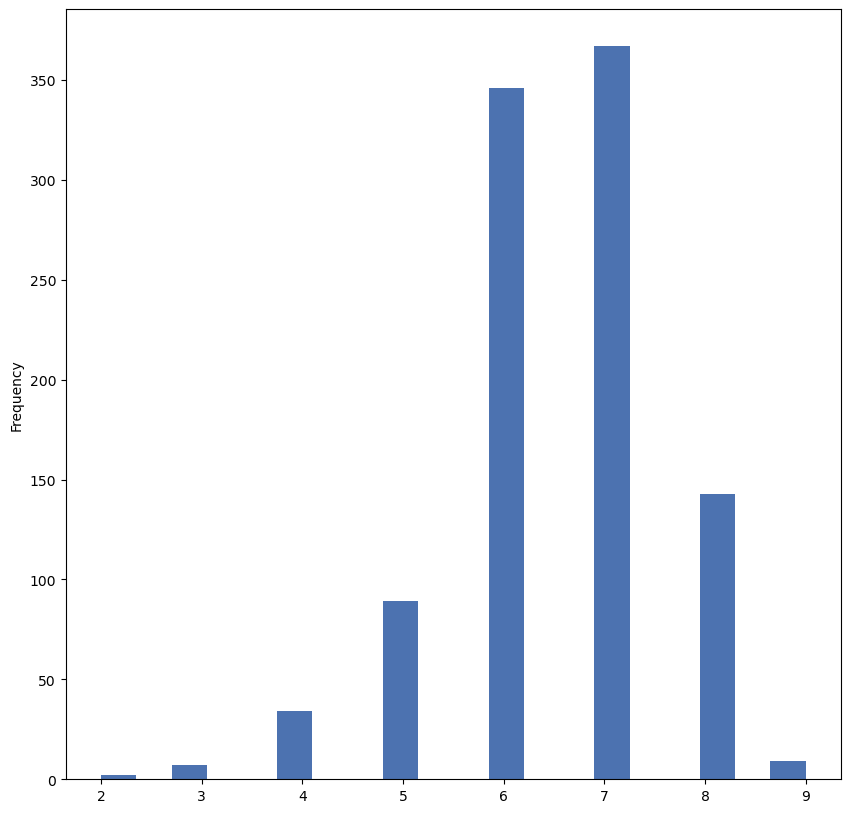

In [32]:
tidy2_t_r_b['averagerating'].plot.hist(bins = 20)

Histogram of ratings - left skewed. most ratings between 6 and 7.

In [33]:
# Wanted to separate the genres column into their individual values
tidy_exploded = tidy2_t_r_b.assign(genres = tidy2_t_r_b.genres.str.split(",")).explode("genres")

tidy_exploded.head()

,title,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,worldwide_gross
3026,Burn the Stage: The Movie,Documentary,9,2067,Trafalgar,4200000.0,16100000.0,2018,20300000.0
3026,Burn the Stage: The Movie,Music,9,2067,Trafalgar,4200000.0,16100000.0,2018,20300000.0
1645,Truth or Dare,Horror,6,14,Uni.,41400000.0,53900000.0,2018,95300000.0
1645,Truth or Dare,Romance,6,14,Uni.,41400000.0,53900000.0,2018,95300000.0
1645,Truth or Dare,Thriller,6,14,Uni.,41400000.0,53900000.0,2018,95300000.0


In [34]:
top_10_gross = tidy2_t_r_b.nlargest(10, 'worldwide_gross')

In [35]:
top_10_gross.head(10)

,title,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,worldwide_gross
1301,Black Panther,"Action,Adventure,Sci-Fi",7,516148,BV,700100000.0,646900000.0,2018,1.347000e+09
1984,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",7,462903,BV,620200000.0,712400000.0,2017,1.332600e+09
2703,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",6,219125,Uni.,417700000.0,891800000.0,2018,1.309500e+09
2373,Incredibles 2,"Action,Adventure,Animation",8,203510,BV,608600000.0,634200000.0,2018,1.242800e+09
2335,Captain America: Civil War,"Action,Adventure,Sci-Fi",8,583507,BV,408100000.0,745200000.0,2016,1.153300e+09
695,Aquaman,"Action,Adventure,Fantasy",7,263328,WB,335100000.0,812700000.0,2018,1.147800e+09
2432,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",8,478592,BV,532200000.0,523900000.0,2016,1.056100e+09
2324,Despicable Me 3,"Adventure,Animation,Comedy",6,92580,Uni.,264600000.0,770200000.0,2017,1.034800e+09
1778,Finding Dory,"Adventure,Animation,Comedy",7,213542,BV,486300000.0,542300000.0,2016,1.028600e+09
2165,Zootopia,"Adventure,Animation,Comedy",8,383446,BV,341300000.0,682500000.0,2016,1.023800e+09


<Axes: title={'center': 'Top 10 Films in Revenue'}, xlabel='Film Title', ylabel='Dollars in Billions'>

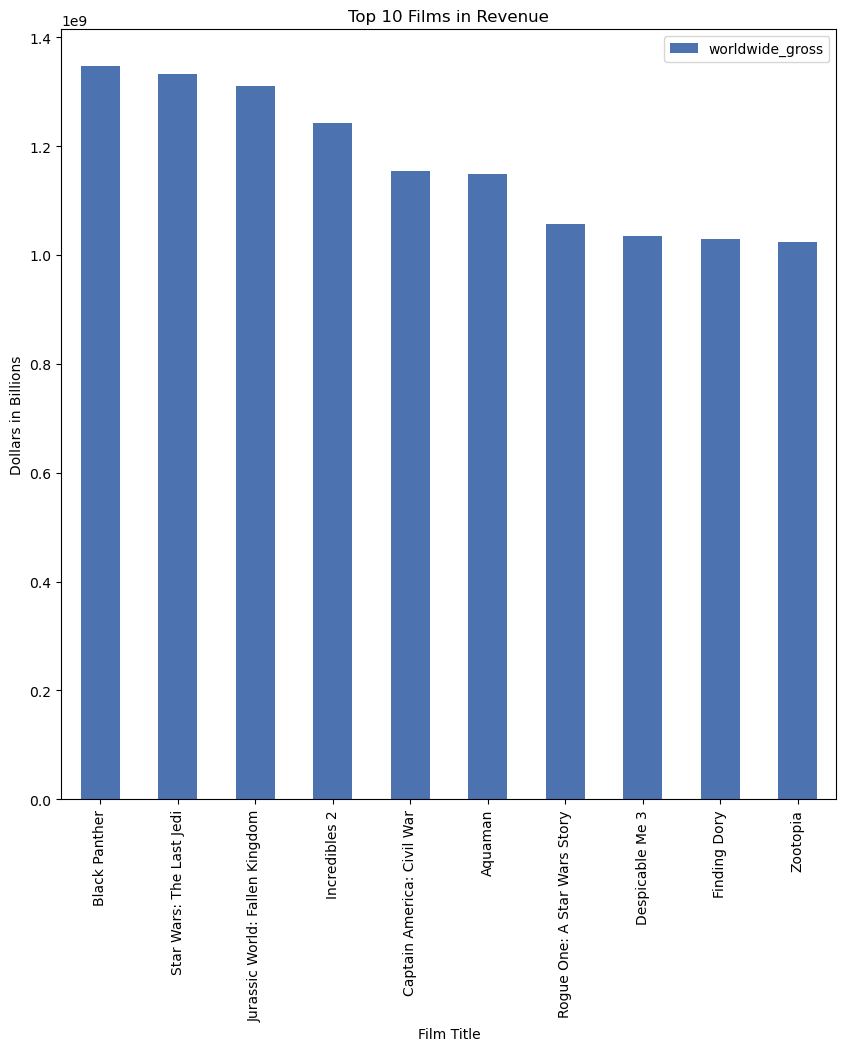

In [36]:
top_10_gross.plot('title', 'worldwide_gross', kind='bar', xlabel ='Film Title', ylabel ='Dollars in Billions', title = 'Top 10 Films in Revenue')


In [37]:
# With the exploded data, there are now duplicate rows. I wanted to see how many rows were now in the Top 10
result = tidy_exploded.loc[[1301,1984,2703,2373,2335,695,2432,2324,1778,2165], 'title']

In [38]:
top_10_gross_tidy = tidy_exploded.nlargest(30, 'worldwide_gross')


In [67]:
top_genres_count = top_10_gross.loc[:,'title':'genres']
top_genres_count.style

,title,genres
1301,Black Panther,"Action,Adventure,Sci-Fi"
1984,Star Wars: The Last Jedi,"Action,Adventure,Fantasy"
2703,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi"
2373,Incredibles 2,"Action,Adventure,Animation"
2335,Captain America: Civil War,"Action,Adventure,Sci-Fi"
695,Aquaman,"Action,Adventure,Fantasy"
2432,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi"
2324,Despicable Me 3,"Adventure,Animation,Comedy"
1778,Finding Dory,"Adventure,Animation,Comedy"
2165,Zootopia,"Adventure,Animation,Comedy"


In [39]:
# Analysing the data over 3 years of genre and rating
sorted_genres = tidy_exploded.sort_values(['averagerating']).groupby('genres')
all_dfs_list = []
for value, group in sorted_genres:
    print('-', value, '-')
    #print(group)
    print(group.reset_index(drop=True))
    all_dfs_list.append(group.reset_index(drop=True))
  


- Action -
                              title  genres  averagerating  numvotes studio  \
0                     Munna Michael  Action              3      2295   Eros   
1                          Judwaa 2  Action              4      7136    FIP   
2                            Dangal  Action              4        20    UTV   
3                       Singularity  Action              4     12230     VE   
4                  Buddies in India  Action              4       221     CL   
..                              ...     ...            ...       ...    ...   
221                         Dunkirk  Action              8    466580     WB   
222                    Wonder Woman  Action              8    487527     WB   
223  War for the Planet of the Apes  Action              8    201943    Fox   
224                  Thor: Ragnarok  Action              8    482995     BV   
225                          Dancer  Action              9        11    IFC   

     domestic_gross  foreign_gross  year

In [40]:
top_genre_rate = sorted_genres['averagerating'].mean()

In [41]:
top10_genre_rate = top_genre_rate.nlargest(10)

<Axes: title={'center': 'Top 10 Genres in Rating'}, xlabel='genres', ylabel='Average Rating'>

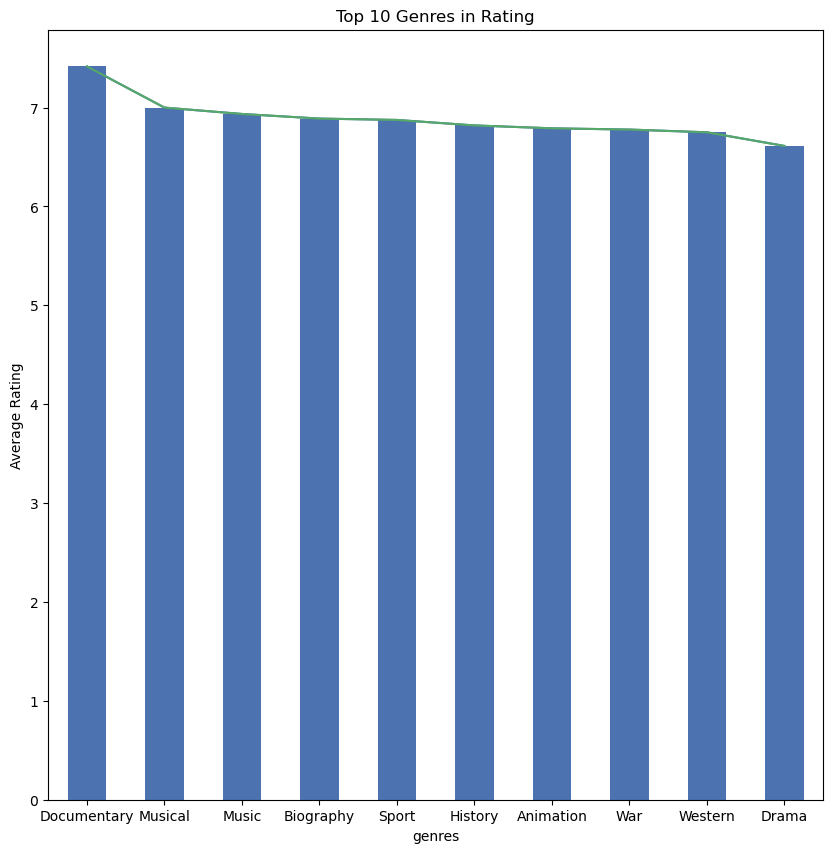

In [42]:
top10_genre_rate.plot(kind='bar')
top10_genre_rate.plot(ylabel = 'Average Rating')
top10_genre_rate.plot(title = 'Top 10 Genres in Rating')

# Documentary is the highest but in regards to the top 10 movies - Animation

In [43]:
top_genre_dollars = sorted_genres['worldwide_gross'].mean()


In [44]:
sorted_studios = tidy2_t_r_b.sort_values(['worldwide_gross']).groupby('studio')
all_dfs_list = []
for value, group in sorted_studios:
    print('-', value, '-')
    #print(group)
    print(group.reset_index(drop=True))
    all_dfs_list.append(group.reset_index(drop=True))

- A24 -
                  title                       genres  averagerating  numvotes  \
0   Trespass Against Us           Action,Crime,Drama              6      6640   
1                Mojave               Drama,Thriller              5      3726   
2      The Sea of Trees        Drama,Fantasy,Mystery              6     11498   
3     Oasis: Supersonic  Biography,Documentary,Music              8      8625   
4          Lean on Pete              Adventure,Drama              7      8607   
5         A Ghost Story        Drama,Fantasy,Romance              7     46280   
6             Free Fire          Action,Comedy,Crime              6     35954   
7        American Honey      Adventure,Drama,Romance              7     31663   
8             Good Time         Crime,Drama,Thriller              7     52305   
9                Equals                        Drama              7        29   
10               Equals         Drama,Romance,Sci-Fi              6     24032   
11           Green R

In [45]:
studio_dollars = sorted_studios['worldwide_gross'].mean()


In [46]:
top_studio_dollars = studio_dollars.nlargest(10)
top_studio_dollars.head()

studio
HC          8.703000e+08
BV          6.247215e+08
WB          3.539722e+08
GrtIndia    2.542000e+08
Uni.        2.462577e+08
Name: worldwide_gross, dtype: float64

<Axes: title={'center': 'Top Studios in Revenue'}, xlabel='studio', ylabel='Dollars in Billions'>

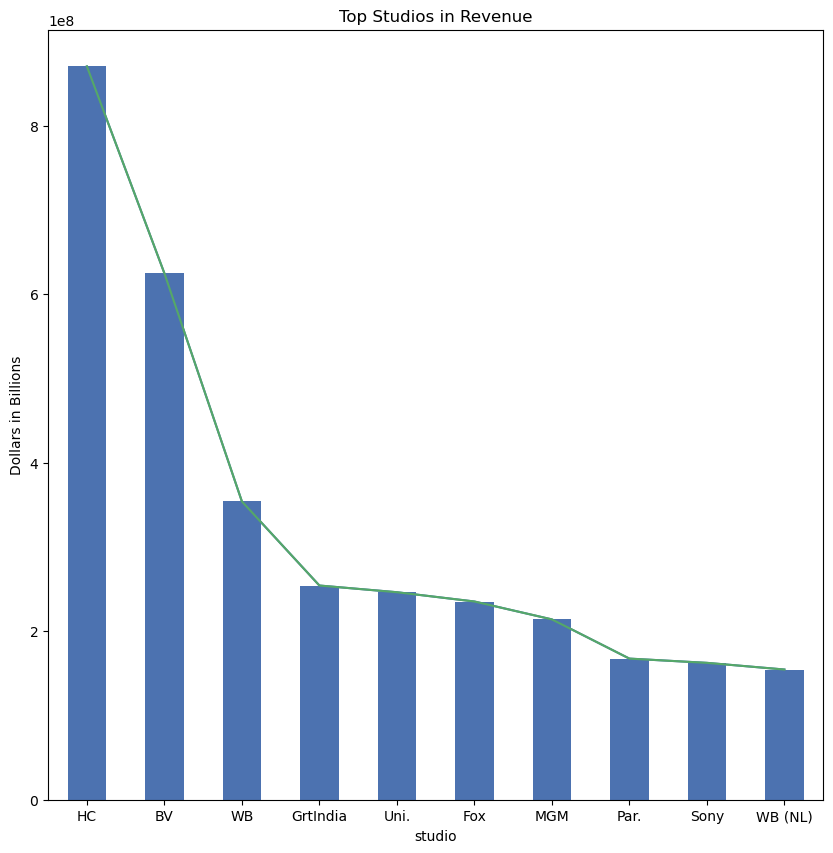

In [47]:
top_studio_dollars.plot(kind='bar')
top_studio_dollars.plot(ylabel = 'Dollars in Billions')
top_studio_dollars.plot(title = 'Top Studios in Revenue')


In [83]:
top_studio = top_10_gross.loc[:,['title','studio']]
top_studio.style

,title,studio
1301,Black Panther,BV
1984,Star Wars: The Last Jedi,BV
2703,Jurassic World: Fallen Kingdom,Uni.
2373,Incredibles 2,BV
2335,Captain America: Civil War,BV
695,Aquaman,WB
2432,Rogue One: A Star Wars Story,BV
2324,Despicable Me 3,Uni.
1778,Finding Dory,BV
2165,Zootopia,BV
